In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 1. EDA

## 1.1 Data loading and initial data inspection

In [9]:
df = pd.read_csv('sochi.csv')
df.head()

,House area,Storeys,Yard Area,Water supply,Electricity,House Material,House Condition,Number of Bedrooms,Land Category,Ground Status,...,Gas,Cellar,Terrace,Garage,Bath,Security,Swimming pool,Year Built,Class,Price
0,115.0,3.0,6.00,Yes,Yes,Other,Not specified,NaN,Not specified,Not specified,...,No,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Other,3800000.0
1,280.0,2.0,10.00,Central,Yes,Monolithic,Can live,4.0,Lands of populated areas,Individual housing construction,...,Mainline in the house or on the plot,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Other,25000000.0
2,180.0,2.0,6.00,Central,Yes,Gas concrete block,Not specified,3.0,Lands of populated areas,Individual housing construction,...,Mainline in the house or on the plot,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Other,27500000.0
3,400.0,3.0,25.00,Central,Yes,Monolithic,Can live,4.0,Lands of populated areas,Individual housing construction,...,Mainline in the house or on the plot,1.0,1.0,1.0,1.0,1.0,1.0,2015.0,Other,37000000.0
4,360.0,2.0,4.17,No,No,Other,Not specified,NaN,Not specified,Not specified,...,No,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Elite,85000000.0


In [10]:
df.columns.values

array(['House area', 'Storeys', 'Yard Area', 'Water supply',
       'Electricity', 'House Material', 'House Condition',
       'Number of Bedrooms', 'Land Category', 'Ground Status', 'Bathroom',
       'Sewerage', 'Heating', 'Gas', 'Cellar', 'Terrace', 'Garage',
       'Bath', 'Security', 'Swimming pool', 'Year Built', 'Class',
       'Price'], dtype=object)

In [11]:
df.shape

(1408, 23)

In [12]:
df.dtypes

House area            float64
Storeys               float64
Yard Area             float64
Water supply           object
Electricity            object
House Material         object
House Condition        object
Number of Bedrooms    float64
Land Category          object
Ground Status          object
Bathroom               object
Sewerage               object
Heating                object
Gas                    object
Cellar                float64
Terrace               float64
Garage                float64
Bath                  float64
Security              float64
Swimming pool         float64
Year Built            float64
Class                  object
Price                 float64
dtype: object

In [13]:
df.describe()

,House area,Storeys,Yard Area,Number of Bedrooms,Cellar,Terrace,Garage,Bath,Security,Swimming pool,Year Built,Price
count,1408.000000,1321.000000,1408.000000,1006.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,628.000000,1.408000e+03
mean,289.412287,2.264951,9.826513,4.424453,0.328125,0.504261,0.657670,0.589489,0.587358,0.656960,2019.246815,3.995846e+07
std,157.710414,0.669276,20.610755,1.489518,0.469697,0.500159,0.474658,0.492101,0.492484,0.474893,5.471216,6.083524e+07
min,30.800000,1.000000,0.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,3.800000e+06
25%,200.000000,2.000000,5.300000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,2.100000e+07
50%,253.000000,2.000000,8.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,2.862500e+07
75%,350.000000,3.000000,10.200000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,3.700000e+07
max,1500.000000,16.000000,677.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,1.500000e+09


In [14]:
features = df.iloc[:, :-1]
features.columns.values

array(['House area', 'Storeys', 'Yard Area', 'Water supply',
       'Electricity', 'House Material', 'House Condition',
       'Number of Bedrooms', 'Land Category', 'Ground Status', 'Bathroom',
       'Sewerage', 'Heating', 'Gas', 'Cellar', 'Terrace', 'Garage',
       'Bath', 'Security', 'Swimming pool', 'Year Built', 'Class'],
      dtype=object)

In [15]:
target = df.iloc[:,-1]
target

0        3800000.0
1       25000000.0
2       27500000.0
3       37000000.0
4       85000000.0
           ...    
1403    35000000.0
1404    33000000.0
1405    23000000.0
1406    20000000.0
1407    42000000.0
Name: Price, Length: 1408, dtype: float64

Text(0.5, 1.0, 'Price boxplot')

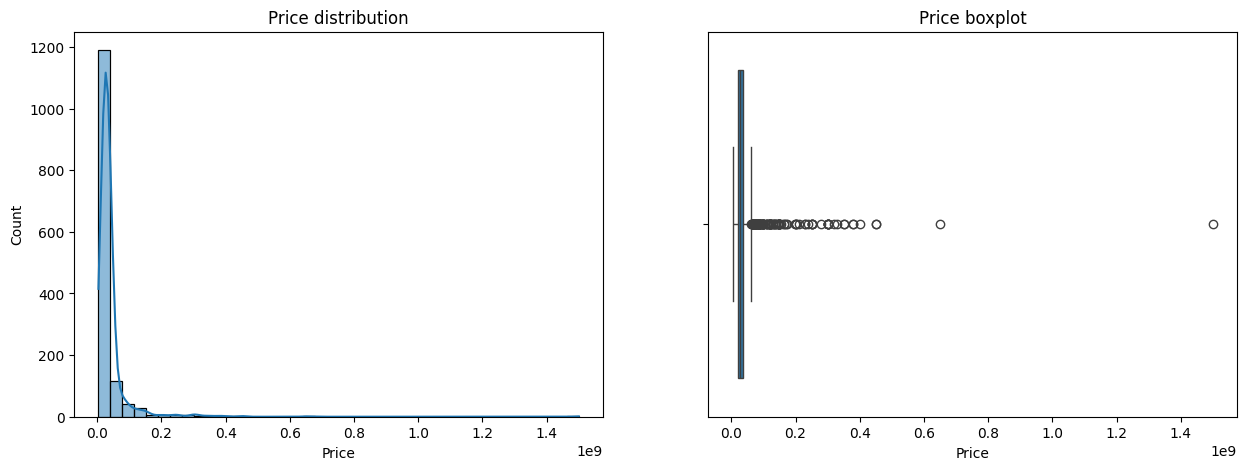

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(target, bins=40, kde=True)
plt.title("Price distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x=target)
plt.title('Price boxplot')

### Price probably has an exponential distribution. Maybe we should prologarithmize it

In [17]:
log_target = np.log(target)
log_target

0       15.150512
1       17.034386
2       17.129697
3       17.426428
4       18.258162
          ...    
1403    17.370859
1404    17.312018
1405    16.951005
1406    16.811243
1407    17.553180
Name: Price, Length: 1408, dtype: float64

Text(0.5, 1.0, 'Price boxplot')

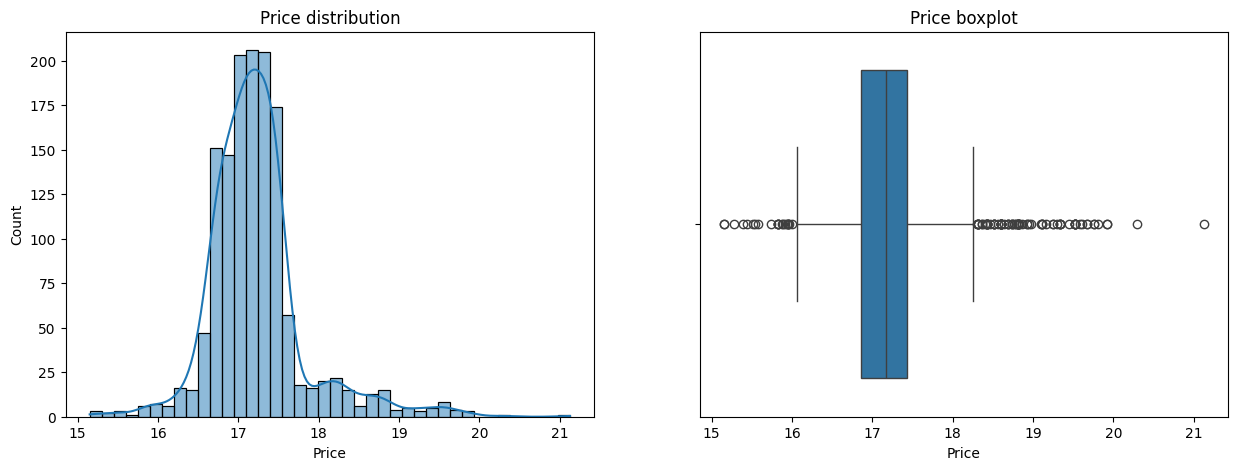

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(log_target, bins=40, kde=True)
plt.title("Price distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x=log_target)
plt.title('Price boxplot')

### So, now it looks more normal

In [19]:
target = log_target

## 1.2 Missing values processing

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   House area          1408 non-null   float64
 1   Storeys             1321 non-null   float64
 2   Yard Area           1408 non-null   float64
 3   Water supply        1408 non-null   object 
 4   Electricity         1408 non-null   object 
 5   House Material      1408 non-null   object 
 6   House Condition     1408 non-null   object 
 7   Number of Bedrooms  1006 non-null   float64
 8   Land Category       1408 non-null   object 
 9   Ground Status       1408 non-null   object 
 10  Bathroom            1408 non-null   object 
 11  Sewerage            1408 non-null   object 
 12  Heating             1408 non-null   object 
 13  Gas                 1408 non-null   object 
 14  Cellar              1408 non-null   float64
 15  Terrace             1408 non-null   float64
 16  Garage

### There are few missing values in columns 'Storeys', so we fill in with the median

In [21]:
median_value = np.round(np.median(features["Storeys"].dropna()))
features["Storeys"] = features["Storeys"].fillna(median_value)

### It in necessary to check if information availability about Number of Bedrroms has any impact on house prices

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

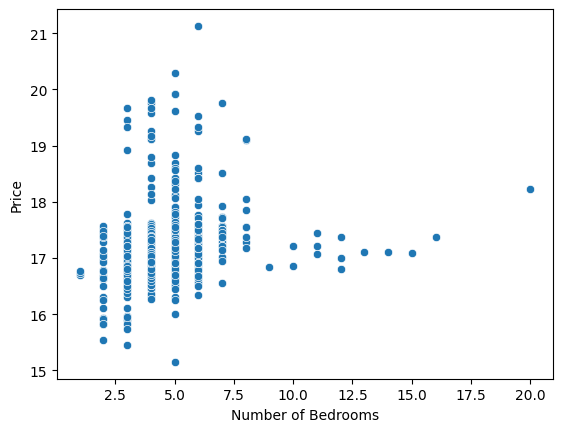

In [22]:
sns.scatterplot(data=df, x="Number of Bedrooms", y=target)

In [23]:
correlation_bedrooms_price = target.corr(features['Number of Bedrooms'])
print("Correlation between house price and number of bedrooms:", correlation_bedrooms_price)

Correlation between house price and number of bedrooms: 0.2283053503677572


In [24]:
df[['Price']].groupby(df['Number of Bedrooms'].isnull()).mean()

,Price
Number of Bedrooms,
False,3.806134e+07
True,4.470600e+07


<Axes: xlabel='Price logarithm', ylabel='Density'>

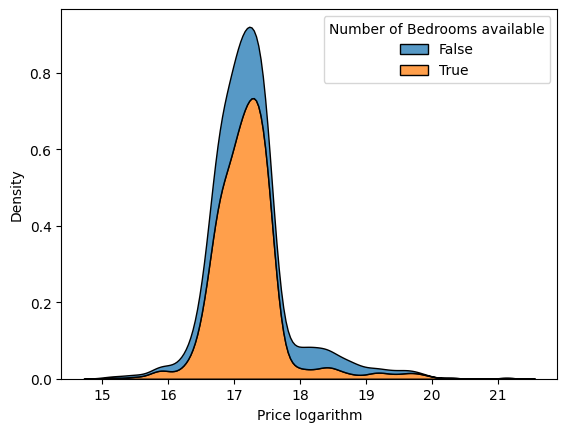

In [25]:
%%capture --no-display

bedrooms_price = df[["Number of Bedrooms", "Price"]]
bedrooms_price.loc[:, "Price"] = np.log(bedrooms_price["Price"])
bedrooms_price.columns = ["Number of Bedrooms", "Price logarithm"]
bedrooms_price.loc[:, 'Number of Bedrooms available'] = bedrooms_price["Number of Bedrooms"].notnull()
print(bedrooms_price["Number of Bedrooms available"].value_counts())
sns.kdeplot(data=bedrooms_price, x="Price logarithm", hue="Number of Bedrooms available", multiple="stack")

#### Verdict: 
##### There is weak correlation between number of rooms and house price, no significant difference in price distribution depending on whether the number of rooms information is omitted.
##### Let's fill in the blanks with the most common value

In [26]:
features["Number of Bedrooms"].value_counts()

Number of Bedrooms
4.0     445
5.0     242
3.0     149
6.0      85
2.0      32
7.0      27
8.0       9
12.0      3
1.0       3
11.0      3
10.0      2
16.0      1
20.0      1
13.0      1
14.0      1
9.0       1
15.0      1
Name: count, dtype: int64

In [27]:
mode = features["Number of Bedrooms"].dropna().mode()[0]
features["Number of Bedrooms"] = features["Number of Bedrooms"].fillna(mode)

### Let's repeat the same procedure for the column "Year Built"

<Axes: xlabel='Year Built', ylabel='Price'>

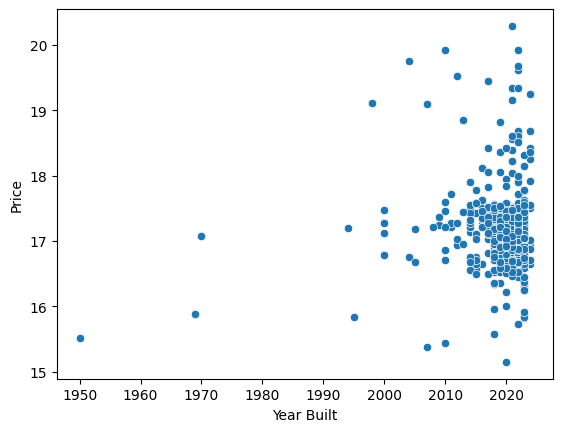

In [28]:
sns.scatterplot(data=df, x="Year Built", y=target)

In [29]:
correlation_bedrooms_price = target.corr(features['Year Built'])
print("Correlation between house price and year of building:", correlation_bedrooms_price)

Correlation between house price and year of building: 0.060126724434535456


In [30]:
df[['Price']].groupby(df['Year Built'].isnull()).mean()

,Price
Year Built,
False,3.707375e+07
True,4.228103e+07


<Axes: xlabel='Price logarithm', ylabel='Density'>

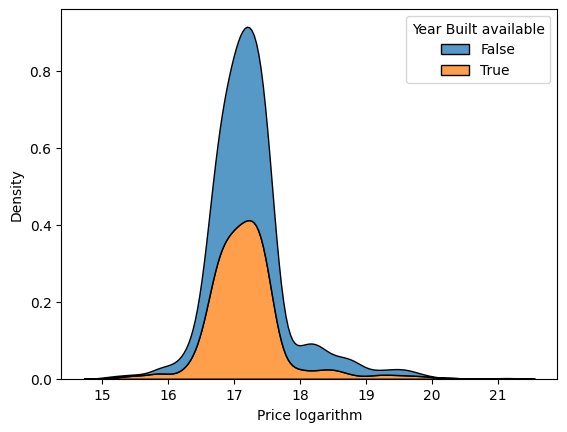

In [31]:
%%capture --no-display

year_price = df[["Year Built", "Price"]]
year_price.loc[:, "Price"] = np.log(year_price["Price"])
year_price.columns = ["Year Built available", "Price logarithm"]
year_price.loc[:, "Year Built available"] = year_price["Year Built available"].notnull()
print(year_price["Year Built available"].value_counts())
sns.kdeplot(data=year_price, x="Price logarithm", hue="Year Built available", multiple="stack")

#### Verdict: 
##### There is no correlation between year of building and house price, no significant difference in price distribution depending on whether the year of building information is omitted.
##### Most values are missing, so let's just drop the column Year Built

In [32]:
features.drop('Year Built', axis=1, inplace=True)

In [33]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   House area          1408 non-null   float64
 1   Storeys             1408 non-null   float64
 2   Yard Area           1408 non-null   float64
 3   Water supply        1408 non-null   object 
 4   Electricity         1408 non-null   object 
 5   House Material      1408 non-null   object 
 6   House Condition     1408 non-null   object 
 7   Number of Bedrooms  1408 non-null   float64
 8   Land Category       1408 non-null   object 
 9   Ground Status       1408 non-null   object 
 10  Bathroom            1408 non-null   object 
 11  Sewerage            1408 non-null   object 
 12  Heating             1408 non-null   object 
 13  Gas                 1408 non-null   object 
 14  Cellar              1408 non-null   float64
 15  Terrace             1408 non-null   float64
 16  Garage

## 1.3 Сontiguous feature distribution overview

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

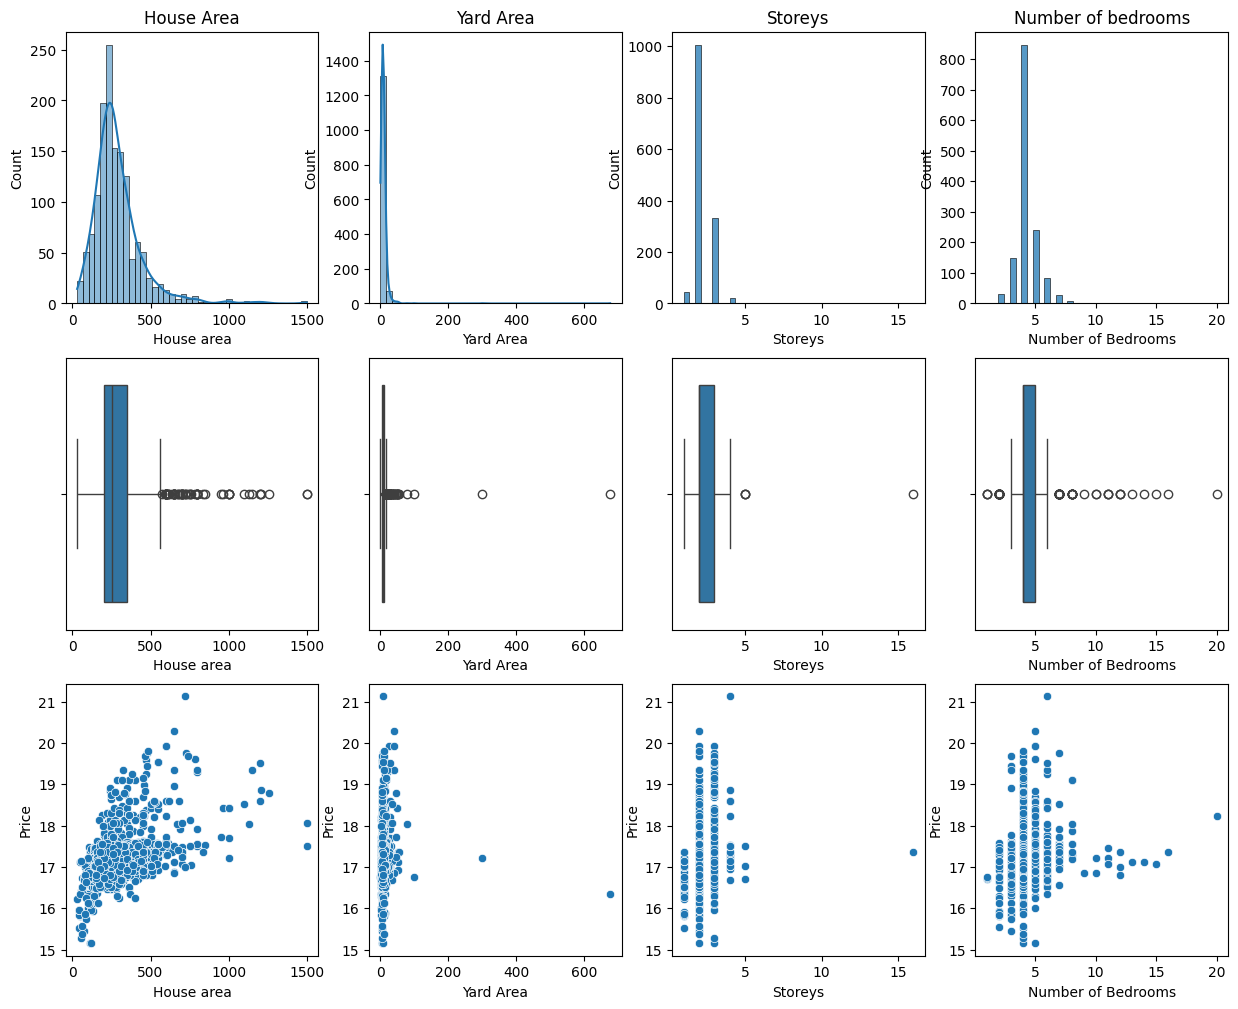

In [34]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 4, 1)
sns.histplot(features["House area"], bins=40, kde=True)
plt.title("House Area")

plt.subplot(3, 4, 2)
sns.histplot(features["Yard Area"], bins=40, kde=True)
plt.title("Yard Area")

plt.subplot(3, 4, 3)
sns.histplot(features["Storeys"], bins=40)
plt.title("Storeys")

plt.subplot(3, 4, 4)
sns.histplot(features["Number of Bedrooms"], bins=40)
plt.title("Number of bedrooms")

plt.subplot(3, 4, 5)
sns.boxplot(x=features["House area"])

plt.subplot(3, 4, 6)
sns.boxplot(x=features["Yard Area"])

plt.subplot(3, 4, 7)
sns.boxplot(x=features["Storeys"])

plt.subplot(3, 4, 8)
sns.boxplot(x=features["Number of Bedrooms"])

plt.subplot(3, 4, 9)
sns.scatterplot(data=features, x="House area", y=target)

plt.subplot(3, 4, 10)
sns.scatterplot(data=features, x="Yard Area", y=target)

plt.subplot(3, 4, 11)
sns.scatterplot(data=features, x="Storeys", y=target)

plt.subplot(3, 4, 12)
sns.scatterplot(data=features, x="Number of Bedrooms", y=target)

In [35]:
categoricals = ["Water supply", "Electricity", "House Material", "House Condition", "Land Category", "Ground Status", "Bathroom", "Sewerage", "Heating", "Gas", "Class"]
numerics = ["House area", "Storeys", "Yard Area", "Number of Bedrooms", "Cellar", "Terrace", "Garage", "Bath", "Security", "Swimming pool"]
numerics_not_binary = ["House area", "Storeys", "Yard Area", "Number of Bedrooms"]
categoricals_with_binary = categoricals + ["Cellar", "Terrace", "Garage", "Bath", "Security", "Swimming pool"]

<Axes: >

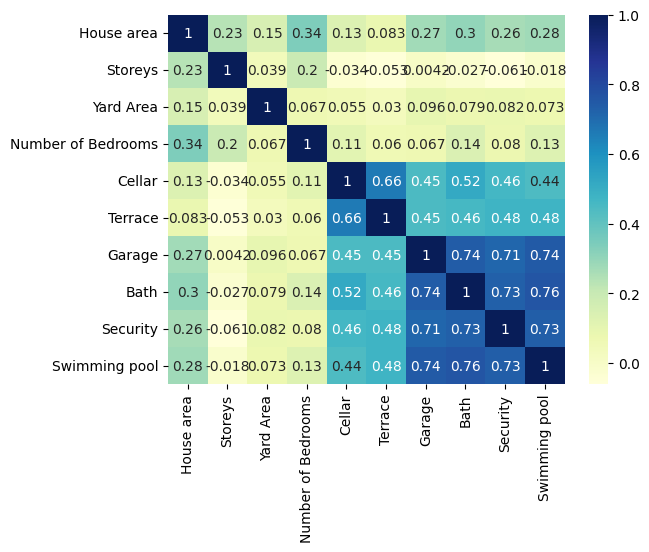

In [36]:
sns.heatmap(features[numerics].corr(), annot=True, cmap='YlGnBu')

#### The strong correlation between the features in the bottom right corner is due to the specifics in the data. These features are categorical and binary. House advertisements usually listed either many amenities at once or none at all. 

In [37]:
numerics = numerics_not_binary
categoricals = categoricals_with_binary
print(numerics)
print(categoricals)

['House area', 'Storeys', 'Yard Area', 'Number of Bedrooms']
['Water supply', 'Electricity', 'House Material', 'House Condition', 'Land Category', 'Ground Status', 'Bathroom', 'Sewerage', 'Heating', 'Gas', 'Class', 'Cellar', 'Terrace', 'Garage', 'Bath', 'Security', 'Swimming pool']


## 1.4 Handling outliers

#### Boxplot and histogram of the column 'Yard Area' look too abnormal because of few strong outliers. I will handle them with "replacing with thresholds" strategy

In [38]:
q1 = 0.25
q3 = 0.75
quartile1 = features["Yard Area"].quantile(q1)
quartile3 = features["Yard Area"].quantile(q3)
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 12.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range

In [39]:
features.loc[(features["Yard Area"] < low_limit), "Yard Area"] = low_limit
features.loc[(features["Yard Area"] > up_limit), "Yard Area"] = up_limit

<Axes: xlabel='Yard Area', ylabel='Price'>

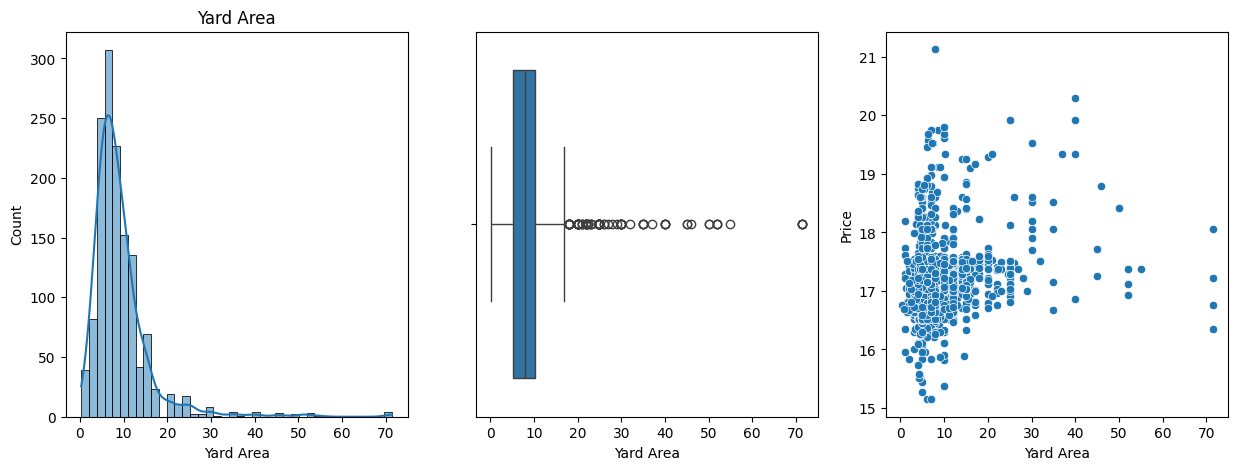

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(features["Yard Area"], bins=40, kde=True)
plt.title("Yard Area")

plt.subplot(1, 3, 2)
sns.boxplot(x=features["Yard Area"])

plt.subplot(1, 3, 3)
sns.scatterplot(data=features, x="Yard Area", y=target)

#### Handling the outlier in Storeys column that I caught from scatterpot

In [41]:
features.loc[(features["Storeys"] > 6), "Storeys"] = 6

<Axes: xlabel='Storeys', ylabel='Price'>

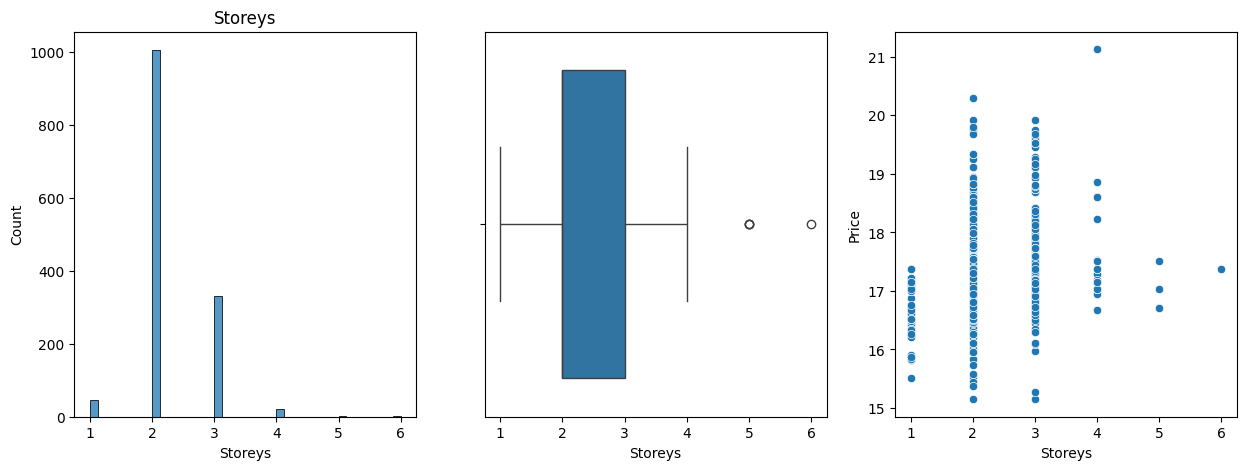

In [42]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(features["Storeys"], bins=40)
plt.title("Storeys")

plt.subplot(1, 3, 2)
sns.boxplot(x=features["Storeys"])

plt.subplot(1, 3, 3)
sns.scatterplot(data=features, x="Storeys", y=target)

## 1.5 Categoricals Observation

In [43]:
categoricals

['Water supply',
 'Electricity',
 'House Material',
 'House Condition',
 'Land Category',
 'Ground Status',
 'Bathroom',
 'Sewerage',
 'Heating',
 'Gas',
 'Class',
 'Cellar',
 'Terrace',
 'Garage',
 'Bath',
 'Security',
 'Swimming pool']

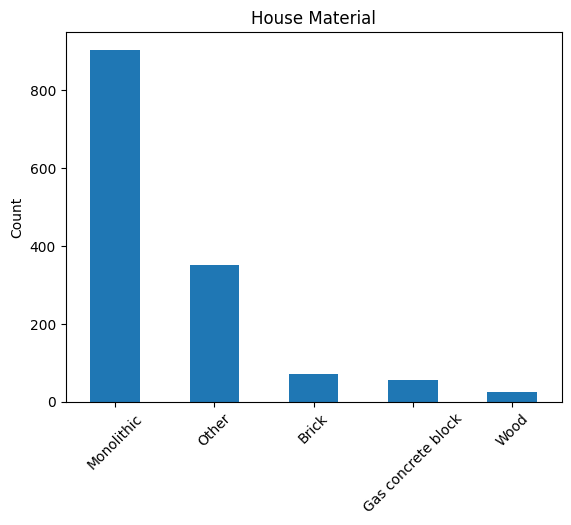

In [44]:
material_counts = features["House Material"].value_counts()
rare_materials = material_counts[material_counts < 25].index
features.loc[features["House Material"].isin(rare_materials), "House Material"] = "Other"

house_materials = features['House Material'].value_counts()
house_materials.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('House Material')

plt.show()

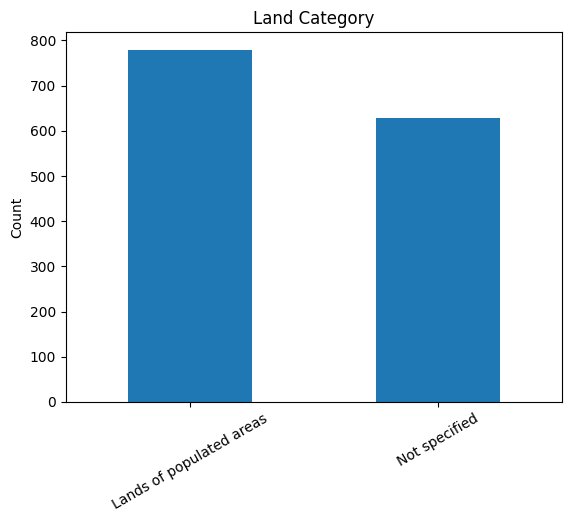

In [45]:
material_counts = features["Land Category"].value_counts()
rare_materials = material_counts[material_counts < 35].index
features.loc[features["Land Category"].isin(rare_materials), "Land Category"] = "Not specified"

house_materials = features['Land Category'].value_counts()
house_materials.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.title('Land Category')

plt.show()

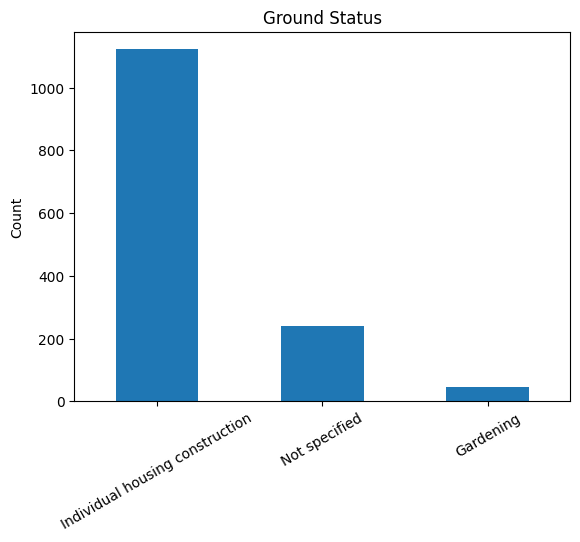

In [46]:
material_counts = features["Ground Status"].value_counts()
rare_materials = material_counts[material_counts < 35].index
features.loc[features["Ground Status"].isin(rare_materials), "Ground Status"] = "Not specified"

house_materials = features['Ground Status'].value_counts()
house_materials.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.title('Ground Status')

plt.show()

Text(0.5, 1.0, 'Bathroom')

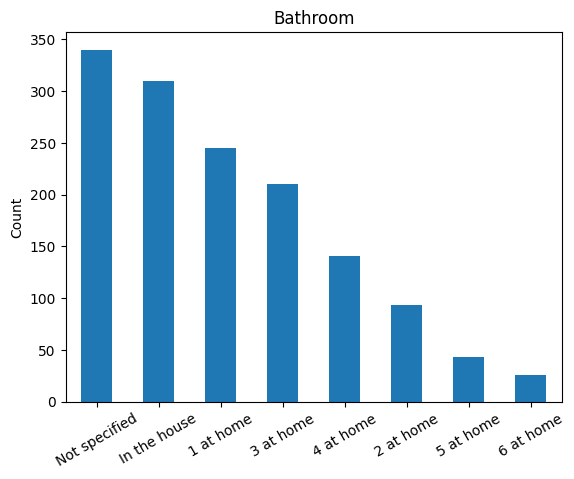

In [47]:
material_counts = features["Bathroom"].value_counts()
rare_materials = material_counts[material_counts < 25].index
features.loc[features["Bathroom"].isin(rare_materials), "Bathroom"] = "Not specified"

house_materials = features['Bathroom'].value_counts()
house_materials.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.title('Bathroom')

Text(0.5, 1.0, 'Gas')

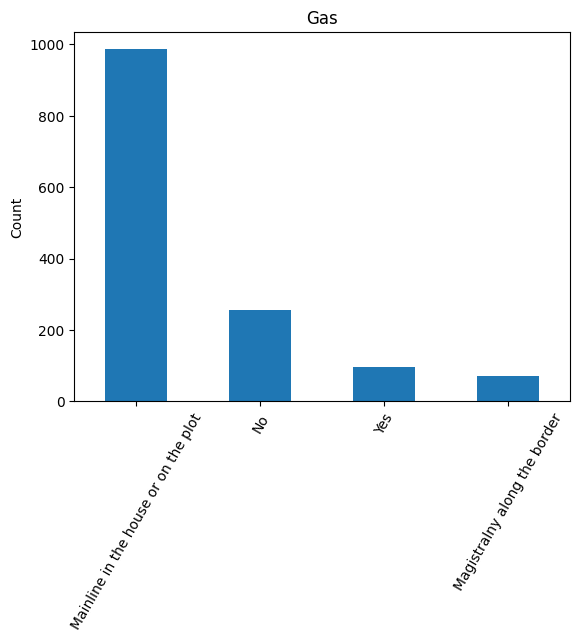

In [48]:
material_counts = features["Gas"].value_counts()
rare_materials = material_counts[material_counts < 25].index
features.loc[features["Gas"].isin(rare_materials), "Gas"] = "Yes"

house_materials = features['Gas'].value_counts()
house_materials.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.title('Gas')

In [49]:
material_counts = features["Sewerage"].value_counts()
material_counts

Sewerage
Central    821
Yes        248
No         244
Septic      95
Name: count, dtype: int64

Text(0.5, 1.0, 'Heating')

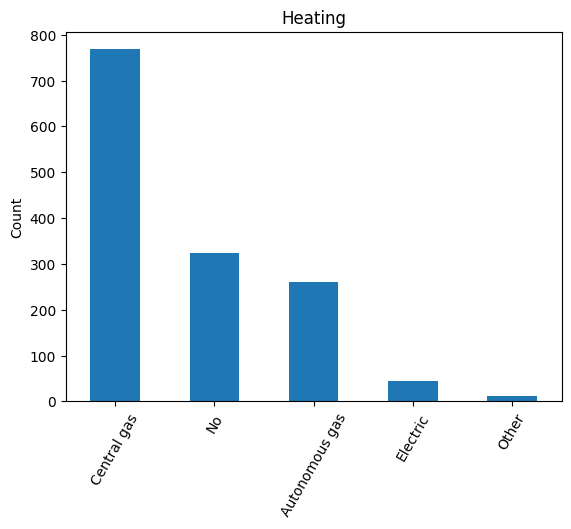

In [50]:
material_counts = features["Heating"].value_counts()
rare_materials = material_counts[material_counts < 25].index
features.loc[features["Heating"].isin(rare_materials), "Heating"] = "Other"

house_materials = features['Heating'].value_counts()
house_materials.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.title('Heating')

In [51]:
material_counts = features["Class"].value_counts()
material_counts

Class
Other       1280
Comfort       67
Elite         27
Economy       17
Business      17
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='Price'>

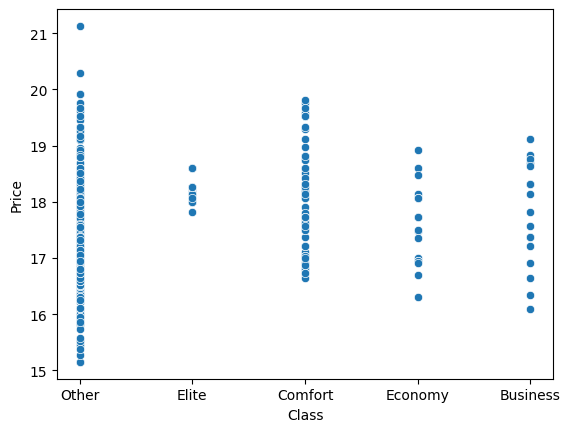

In [52]:
sns.scatterplot(x=features["Class"], y=target)

##### Some Economy class houses are more expensive then Buisiness or Elite, and there are not significant correlation between Class and Price of the house. I'll make this feature binary, expressing whether the class is specified or not

Text(0.5, 1.0, 'Class')

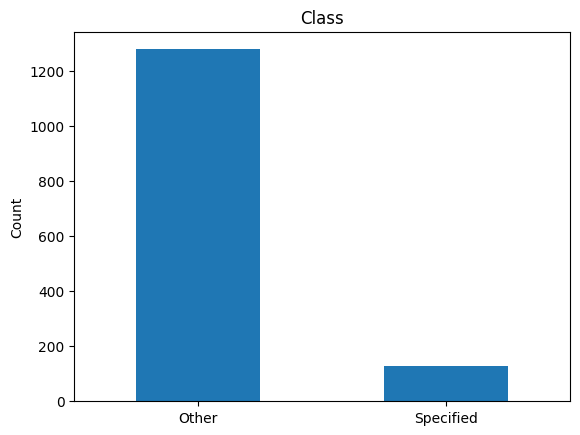

In [53]:
rare_materials = material_counts[material_counts < 500].index
features.loc[features["Class"].isin(rare_materials), "Class"] = "Specified"

house_materials = features["Class"].value_counts()
house_materials.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title("Class")

# 2. Modeling for predict house prices (regression problem)

In [54]:
X = features
y = target
X.head()

,House area,Storeys,Yard Area,Water supply,Electricity,House Material,House Condition,Number of Bedrooms,Land Category,Ground Status,...,Sewerage,Heating,Gas,Cellar,Terrace,Garage,Bath,Security,Swimming pool,Class
0,115.0,3.0,6.00,Yes,Yes,Other,Not specified,4.0,Not specified,Not specified,...,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,Other
1,280.0,2.0,10.00,Central,Yes,Monolithic,Can live,4.0,Lands of populated areas,Individual housing construction,...,Central,Central gas,Mainline in the house or on the plot,1.0,1.0,1.0,1.0,1.0,1.0,Other
2,180.0,2.0,6.00,Central,Yes,Gas concrete block,Not specified,3.0,Lands of populated areas,Individual housing construction,...,Central,Central gas,Mainline in the house or on the plot,0.0,1.0,1.0,1.0,1.0,1.0,Other
3,400.0,3.0,25.00,Central,Yes,Monolithic,Can live,4.0,Lands of populated areas,Individual housing construction,...,Central,Central gas,Mainline in the house or on the plot,1.0,1.0,1.0,1.0,1.0,1.0,Other
4,360.0,2.0,4.17,No,No,Other,Not specified,4.0,Not specified,Not specified,...,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,Specified


In [55]:
X.shape, y.shape

((1408, 21), (1408,))

### 2.1 Encoding categoricals

In [56]:
print(categoricals, "\n")
X.info()

['Water supply', 'Electricity', 'House Material', 'House Condition', 'Land Category', 'Ground Status', 'Bathroom', 'Sewerage', 'Heating', 'Gas', 'Class', 'Cellar', 'Terrace', 'Garage', 'Bath', 'Security', 'Swimming pool'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   House area          1408 non-null   float64
 1   Storeys             1408 non-null   float64
 2   Yard Area           1408 non-null   float64
 3   Water supply        1408 non-null   object 
 4   Electricity         1408 non-null   object 
 5   House Material      1408 non-null   object 
 6   House Condition     1408 non-null   object 
 7   Number of Bedrooms  1408 non-null   float64
 8   Land Category       1408 non-null   object 
 9   Ground Status       1408 non-null   object 
 10  Bathroom            1408 non-null   object 
 11  Sewerage            1408 no

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [58]:
one_hot_features = ['Water supply', 'House Material', 'Gas', 'Heating', 'Bathroom', 'Sewerage', 'Electricity']      # Признаки для OneHotEncoder
ordinal_features = ['House Condition', 'Class', 'Land Category', 'Ground Status']             # Признаки для OrdinalEncoder

# Создание ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop="if_binary"), one_hot_features),
        ('ordinal', OrdinalEncoder(), ordinal_features)
    ],
    remainder='passthrough'  # Удаляет колонки, не участвующие в трансформации
)

X_encoded = preprocessor.fit_transform(X)
X = pd.DataFrame(X_encoded, columns=preprocessor.get_feature_names_out())
X

,onehot__Water supply_Central,onehot__Water supply_No,onehot__Water supply_Well,onehot__Water supply_Yes,onehot__House Material_Brick,onehot__House Material_Gas concrete block,onehot__House Material_Monolithic,onehot__House Material_Other,onehot__House Material_Wood,onehot__Gas_Magistralny along the border,...,remainder__House area,remainder__Storeys,remainder__Yard Area,remainder__Number of Bedrooms,remainder__Cellar,remainder__Terrace,remainder__Garage,remainder__Bath,remainder__Security,remainder__Swimming pool
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,115.0,3.0,6.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,280.0,2.0,10.00,4.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,180.0,2.0,6.00,3.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,400.0,3.0,25.00,4.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,360.0,2.0,4.17,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,285.0,3.0,5.00,4.0,0.0,1.0,1.0,1.0,1.0,1.0
1404,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,260.0,2.0,8.00,4.0,0.0,1.0,1.0,1.0,1.0,1.0
1405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,180.0,2.0,4.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,149.0,2.0,8.00,3.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((1056, 45), (352, 45))

### 2.2 Lasso linear regression with gredsearch optimized parameter and lasso selection of significant features

In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error

In [62]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.logspace(-3, 3, base=10)}
lasso = Lasso(max_iter=10000)
clf = GridSearchCV(lasso, parameters, scoring=make_scorer(root_mean_squared_error, greater_is_better=False))
clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 0.002329951810515372}

In [63]:
best_lasso = Lasso(max_iter=9000, alpha=0.002).fit(X_train, y_train)
print(root_mean_squared_error(y_test, best_lasso.predict(X_test)))

selected_columns = np.where(np.abs(best_lasso.coef_) > 10**-10)[0]
X_test_selected = X_test.iloc[:, selected_columns]
print(np.array(X_test_selected.columns.values).size, sep=",")
print(*X_test_selected.columns.values, sep=",")

0.4872015672226451
28
onehot__Water supply_Central,onehot__Water supply_No,onehot__Water supply_Well,onehot__Water supply_Yes,onehot__House Material_Brick,onehot__House Material_Gas concrete block,onehot__House Material_Wood,onehot__Gas_No,onehot__Heating_Autonomous gas,onehot__Heating_Other,onehot__Bathroom_1 at home,onehot__Bathroom_4 at home,onehot__Bathroom_6 at home,onehot__Sewerage_Septic,ordinal__House Condition,ordinal__Class,ordinal__Land Category,ordinal__Ground Status,remainder__House area,remainder__Storeys,remainder__Yard Area,remainder__Number of Bedrooms,remainder__Cellar,remainder__Terrace,remainder__Garage,remainder__Bath,remainder__Security,remainder__Swimming pool


In [64]:
best_lasso_selected =  Lasso(max_iter=9000, alpha=0.002).fit(X_train.iloc[:, selected_columns], y_train)
print(root_mean_squared_error(y_test, best_lasso_selected.predict(X_test.iloc[:, selected_columns])))

0.48720131017722845


### 2.3 Desicion Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
tree = DecisionTreeRegressor()
parameters = {'max_depth': np.arange(2, 18),
             'splitter': ["best", "random"],
             'min_samples_split': np.arange(2, 100)
             }
clf = GridSearchCV(tree, parameters, scoring=make_scorer(root_mean_squared_error, greater_is_better=False))
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 4, 'min_samples_split': 10, 'splitter': 'best'}

In [67]:
best_tree = DecisionTreeRegressor(**clf.best_params_).fit(X_train, y_train)
print(root_mean_squared_error(y_test, best_tree.predict(X_test)))

0.4834092850623105


### 2.4 Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf = RandomForestRegressor(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
print(root_mean_squared_error(y_test, rf.predict(X_test)))
parameters = {'n_estimators': np.arange(5, 120, 10), 
             'max_depth': np.arange(2, 18),
             'min_samples_split': np.arange(8, 15)
             }
clf = GridSearchCV(RandomForestRegressor(random_state=0), parameters, scoring=make_scorer(root_mean_squared_error, greater_is_better=False))
clf.fit(X_train, y_train)
clf.best_params_

0.47020010907357734


{'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 75}

In [70]:
best_rf = RandomForestRegressor(**clf.best_params_).fit(X_train, y_train)
print(root_mean_squared_error(y_test, best_rf.predict(X_test)))

0.44950605140973776


In [71]:
parameters = {'n_estimators': np.arange(65, 100), 
             'max_depth': np.arange(4, 25),
             'min_samples_split': np.arange(6, 25)
             }
clf = GridSearchCV(RandomForestRegressor(random_state=0), parameters, scoring=make_scorer(root_mean_squared_error, greater_is_better=False))
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 74}

In [72]:
best_rf = RandomForestRegressor(**clf.best_params_).fit(X_train, y_train)
print(root_mean_squared_error(y_test, best_rf.predict(X_test)))

0.4557980478389256


### 2.5 Gradient Boosting on Decision Trees

#### 2.5.1 Sklearn GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
print(root_mean_squared_error(y_test, gbr.predict(X_test)))

0.46092729575346814


In [75]:
parameters = {'n_estimators': np.arange(39, 81, 5), 
             'max_depth': np.arange(3, 7),
             'learning_rate': np.logspace(-3, 0, base=10)
             }
clf = GridSearchCV(GradientBoostingRegressor(random_state=0), parameters, scoring=make_scorer(root_mean_squared_error, greater_is_better=False))
clf.fit(X_train, y_train)
clf.best_params_

{'learning_rate': 0.06866488450043001, 'max_depth': 5, 'n_estimators': 69}

In [76]:
best_gbr = GradientBoostingRegressor(**clf.best_params_).fit(X_train, y_train)
print(root_mean_squared_error(y_test, best_gbr.predict(X_test)))

0.463176022233792


In [77]:
parameters = {'n_estimators': np.arange(60, 80), 
             'max_depth': np.arange(3, 7)
             }
clf = GridSearchCV(GradientBoostingRegressor(random_state=0, learning_rate=0.068), parameters, scoring=make_scorer(root_mean_squared_error, greater_is_better=False))
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 4, 'n_estimators': 60}

In [78]:
best_gbr = GradientBoostingRegressor(learning_rate=0.068, **clf.best_params_).fit(X_train, y_train)
print(root_mean_squared_error(y_test, best_gbr.predict(X_test)))

0.4535053859787494


#### 2.5.2 Catboost Gradient Boosting

In [79]:
from catboost import CatBoostRegressor, Pool

##### 1) Сatboost over Encoded features

In [95]:
train_data = Pool(data=X_train, label=y_train)
cbr1 = CatBoostRegressor(iterations=1000)
cbr1.fit(train_data, verbose=False)
print(root_mean_squared_error(y_test, cbr1.predict(X_test)))

0.44783073003377255


##### 2) Catboost over Unencoded features

In [110]:
X_train_unencoded, X_test_unencoded, y_train_unencoded, y_test_unencoded = train_test_split(features, target, test_size=0.25, random_state=42)
X_train_unencoded[categoricals] = X_train_unencoded[categoricals].astype(str)
X_test_unencoded[categoricals] = X_test_unencoded[categoricals].astype(str)
X_train_unencoded.shape, X_test_unencoded.shape

((1056, 21), (352, 21))

In [112]:
train_data = Pool(data=X_train_unencoded, label=y_train_unencoded, cat_features=categoricals)
cbr2 = CatBoostRegressor(iterations=1000)
cbr2.fit(train_data, verbose=False)
print(root_mean_squared_error(y_test_unencoded, cbr2.predict(X_test_unencoded)))

0.4473313829234062


## Summarizing Results

### Top-3 models for this dataset (by RMSE on test sample):
 1) CATBOOST with default parameters and unencoded categorical features
 2) CATBOOST with default parameters and OneHotEncoding
 3) RandomForest with tuning hyperparameters